<a href="https://colab.research.google.com/github/AlexandreAbruzzi/Missao-Pratica-N4/blob/main/Miss%C3%A3o_Pr%C3%A1tica_N%C3%ADvel_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: **Alexandre**

#Missão Prática Nível 4
Implementar um programa orientado a objetos para
visualizar e aplicar regressao linear em séries temporais


#Importando Bibliotecas

In [39]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
try:
  import weakref
except:
  !pip install weakref
  import weakref

#Classe das Despesas

In [40]:
class Despesas():
  instances = []
  def __init__(self, dicionario, cor, nome):
    self.__class__.instances.append(weakref.proxy(self))
    self.dicionario = dicionario
    self.cor = cor
    self.nome = nome

#Utilizando mesmo nome da variavel e valor nome
Alimentação = Despesas({1:31,2:25,3:49,4:25,5:25}, 'skyblue', 'Alimentação')
Vestuario = Despesas({1:15,2:20,3:10,4:20,5:15}, 'red', 'Vestuario')
Transporte = Despesas({1:8,2:8,3:8,4:21,5:8}, 'yellow', 'Transporte')

#Lista com todos os objetos das Despesas
variaveis = vars()
lista_despesas = []
for i in Despesas.instances:
  lista_despesas += [variaveis[i.nome]]

#Classe para a criação dos Gráficos e Regressão Linear

In [41]:
#Classe responsavel pela criação dos gráficos
class Grafico:  
  def __init__(self, lista_corridas):
    self.lista_corridas=lista_corridas
    self.imprimir_graficos()

  def padrao_do_grafico(self):
    plt.xlabel('Dia')
    plt.ylabel('Despesas (R$)')
    plt.title('Gráficos de Despesas')    

  def imprimir_graficos(self):
    self.padrao_do_grafico()
    for corrida in self.lista_corridas:
      mLista = corrida.dicionario.items()
      cor = corrida.cor
      nome = corrida.nome
      x, y = zip(*mLista)
      plt.plot(x, y, label = nome, marker='o', 
               markerfacecolor='blue', 
               markersize=12, 
               color=cor, 
               linewidth=4)
    plt.legend()
    plt.show()

  def regressao_linear(self, id_grafico):
    corrida = self.lista_corridas[id_grafico]
    mLista = corrida.dicionario.items()    
    cor = corrida.cor
    nome = corrida.nome
    dias, valores = zip(*mLista)
    dias = np.array(dias)
    valores = np.array(valores)
    dias = dias.reshape(-1, 1)
    valores = valores.reshape(-1, 1)
    regr = LinearRegression()
    regr.fit(X=dias, y=valores)
    plt.plot(dias, regr.predict(dias), 
             color='blue',
             label = "Regressão Linear")

    x, y = zip(*mLista)
    plt.plot(x, y, label = nome+str(" - original"), 
             marker='o', 
             markerfacecolor='olive', 
             markersize=12, 
             color=cor, 
             linewidth=4)

    plt.legend()
    plt.show()

#Gerando os Gráficos

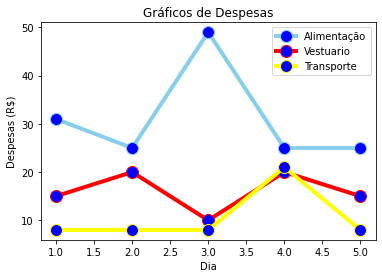

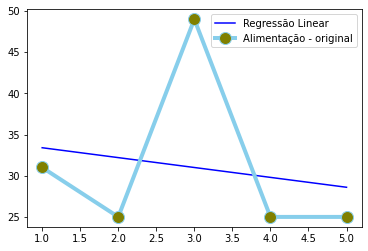

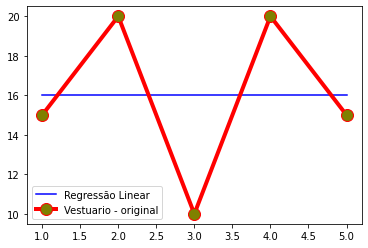

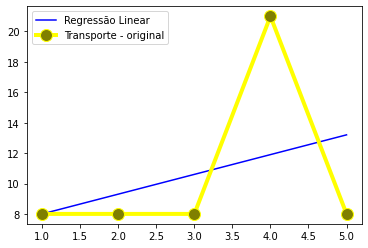

In [42]:
#Mostrar os graficos
grafico = Grafico(lista_despesas)
for i in range(len(lista_despesas)):
  grafico.regressao_linear(i)